In [1]:
from SquareBoard import Board
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc


In [149]:
n = 5

B = Board(n, 1)



tree_segments = []
gem_tree_segments = []
peano_curve_segments = []
peano_curve_matrix = np.empty((4*n, 4*n, 2))
for i in range(n):
    for j in range(n):
        move = B.move_array[i,j]
            
        place = np.array([i,j])

        if i != 0 or j!= 0:

            tree_segments.append([place, move])

            move_is_horiz = (move[0] == i)
            if move_is_horiz:
                shift = np.array([-0.5,0.5])
            else:
                shift = -np.array([-0.5,0.5])

            if i != 0 and j != 0:
                gem_tree_segments.append([move + shift, place + shift])    

for i in range(n-1):
    gem_tree_segments.append([(0.5 + i, n - 0.5), (i+1.5, n-0.5)])
    gem_tree_segments.append([(n - 0.5, 0.5 + i), (n-0.5, i+1.5)]) 

for line in np.array(tree_segments):
    is_horiz = line[1,0] - line[0,0] == 0 
    
    if is_horiz:
        
        x = line[0] + np.array((-0.25,-0.25))
        y = line[1] + np.array((-0.25,0.25))
        
        if np.all(x >= 0):
            peano_curve_segments.append([x,y])
            peano_curve_matrix[int(4*x[0]), int(4*x[1])] = 4*y
            
        x = line[0] + np.array((0.25,-0.25))
        y = line[1] + np.array((0.25,0.25))
        
        if np.all(x < n-0.5):
            peano_curve_segments.append([y,x])
            peano_curve_matrix[int(4*y[0]), int(4*y[1])] = x
            
                
    else:
        x = line[0] + np.array((-0.25,-0.25))
        y = line[1] + np.array((0.25,-0.25))
        
        if np.all(y >= 0):
            peano_curve_segments.append([y,x])
            peano_curve_matrix[int(4*y[0]), int(4*y[1])] = x

            
        x = line[0] + np.array((-0.25,0.25))
        y = line[1] + np.array((0.25,0.25))
        
        if np.all(y < n-0.5):
            peano_curve_segments.append([x,y])    
            peano_curve_matrix[int(4*x[0]), int(4*x[1])] = 4*y
            
for line in np.array(gem_tree_segments):
    is_horiz = line[1,0] - line[0,0] == 0 
    
    if is_horiz:
                
        x = line[0] + np.array((-0.25,0.25))
        y = line[1] + np.array((-0.25,-0.25))
        
        if np.all(x >= 0):
            peano_curve_segments.append([y,x])
            peano_curve_matrix[int(4*y[0]), int(4*y[1])] = x
            
        x = line[0] + np.array((0.25,0.25))
        y = line[1] + np.array((0.25,-0.25))
        
        if np.all(x < n-0.5):
            peano_curve_segments.append([x,y])
            peano_curve_matrix[int(4*x[0]), int(4*x[1])] = 4*y
            
                
    else:
        x = line[0] + np.array((0.25,-0.25))
        y = line[1] + np.array((-0.25,-0.25))
        
        if np.all(y >= 0):
            peano_curve_segments.append([x,y])
            peano_curve_matrix[int(4*x[0]), int(4*x[1])] = 4*y
            
        x = line[0] + np.array((0.25,0.25))
        y = line[1] + np.array((-0.25,0.25))
        
        if np.all(y < n-0.5):
            peano_curve_segments.append([y,x])
            peano_curve_matrix[int(4*y[0]), int(4*y[1])] = 4 * x

for i in range(4*n):
    for j in range(4*n):
        for k in range(2):
            peano_curve_matrix[i,j,k] = round(peano_curve_matrix[i,j,k])


In [150]:
def show_trees(tree_segments, gem_tree_segments, peano_curve_segments):

    segments = tree_segments+gem_tree_segments + peano_curve_segments
    color_list = ["blue" for i in tree_segments] + ["orange" for i in gem_tree_segments] + ["black" for i in peano_curve_segments]
    lc = mc.LineCollection(segments, colors=color_list, linewidths=1)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

    plt.axis("equal")
    plt.show()

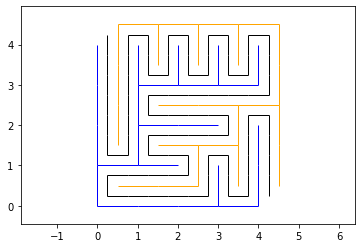

In [151]:
show_trees(tree_segments, gem_tree_segments, peano_curve_segments)

    
    

In [164]:
#print(peano_curve_matrix[0:10,0:10])


In [1]:
peano_curve = [peano_curve_segments[0]] #will be list of points in order

peano_curve_segments = np.array(peano_curve_segments[1:])


while len(peano_curve_segments) > 0:
    i = 0
    cond = False
    while not cond and i < np.shape(peano_curve_segments)[0]:
        
        seg = peano_curve_segments[i]
                   
        if np.all(seg[0] == peano_curve[-1][1]):
            peano_curve.append(seg)
            peano_curve_segments = np.delete(peano_curve_segments,i,axis = 0)
            print(1)
            cond = True
        elif np.all(seg[1] == peano_curve[0][0]):
            peano_curve = [seg] + peano_curve
            peano_curve_segments = np.delete(peano_curve_segments,i, axis = 0)
            print(2)
            cond = True
            
        elif np.all(seg[1] == peano_curve[-1][1]):
            peano_curve.append(np.flip(seg))
            peano_curve_segments = np.delete(peano_curve_segments,i,axis = 0)
            print(1)
            cond = True
        elif np.all(seg[0] == peano_curve[0][0]):
            peano_curve = [np.flip(seg)] + peano_curve
            peano_curve_segments = np.delete(peano_curve_segments,i, axis = 0)
            print(2)
            cond = True
        i+=1

            
print(peano_curve)

NameError: name 'peano_curve_segments' is not defined